# SQL Challenge

## Assumptions for the TA grading my assignment:

### 1. You are using a postgres database
### 2. Your database uses port 5432 or change it in the "databaseconfig.py" file
### 3. You will need to edit the "databaseconfig.py" file with your connection information to test the bonus Jupyter Notebook
### 4. The PGAdmin SQL Tool has a few major limitations.  For instance, there's no way to declare a variable for csv_path.  I tried several different ways to no avail.  In addition, there is no way to use relative pathing to the csv files either.  I tried several ways to do this as well to no avail.  Due to these limitations, you will need to change the path to the CSV files, for every csv file we import, to test the inport functionality.  I apologize but it's not my fault.
### 5. There's some abiguity to a few of the questions in the SQL portion of this project such as: 3, 4, 6 and 7. I have interpreted these as asking to find all CURRENT employees. For example, #6 - List all emloyees in the Sales department (i.e. NOT all employees who have EVER BEEN in the sales department).  If an employee has a to_date in the past, that employee is NO LONGER in the sales department and therefore should NOT be in the list.

### I know it's a bit early but...


<img src="AprilFools.png" alt="April Fools!" style="border: none;" /><br>


In [1]:
# Dependencies
import psycopg2
import numpy as np
import pandas as pd
import databaseconfig as cfg
import pandas.io.sql as sqlio
import matplotlib.pyplot as plt

from pandas import DataFrame
from sqlalchemy import create_engine

In [2]:
# Database connection string
engine = create_engine(f"postgresql://{cfg.mysql['user']}:{cfg.mysql['passwd']}@{cfg.mysql['host']}:{cfg.mysql['port']}/{cfg.mysql['db']}")

# Create a database connection
conn = engine.connect()

# Pull salary information from our database
sql = "SELECT * FROM salaries ORDER BY salary ASC;"
df_salary = pd.read_sql(sql, conn)

# Pull average salaries by title
sql = "SELECT titles.title, AVG(salaries.Salary) AS Avg_Salary FROM salaries "
sql = sql + "INNER JOIN titles ON titles.emp_no = salaries.emp_no GROUP BY titles.title ORDER BY AVG(salaries.Salary) ASC;"
df_avgsalarybytitle = pd.read_sql(sql, conn)

# Where's Waldo?
sql = "SELECT emp_no, first_name, last_name FROM employees WHERE emp_no = 499942;"
df_myself = pd.read_sql(sql, conn)

# Make sure we close our connection to the database
conn.close()

df_salary

,id,emp_no,salary,from_date,to_date
0,14024,24024,40000,1993-03-14,1994-03-14
1,40329,50329,40000,1994-12-17,1995-12-17
2,16406,26406,40000,1993-04-12,1994-04-12
3,16397,26397,40000,1995-01-12,1996-01-12
4,12743,22743,40000,1999-10-30,2000-10-29
...,...,...,...,...,...
300019,27558,37558,125469,1989-02-23,1990-02-23
300020,258327,458302,126703,1998-10-05,1999-10-05
300021,244781,444756,127041,1999-06-14,2000-06-13
300022,34188,44188,127238,1991-03-16,1992-03-15


In [3]:
# Min & Max Salaries
min_salary = '${:0,.0f}'.format(df_salary["salary"].min())
max_salary = '${:0,.0f}'.format(df_salary["salary"].max())

# Show our min and max salaries
min_salary, max_salary

('$40,000', '$129,492')

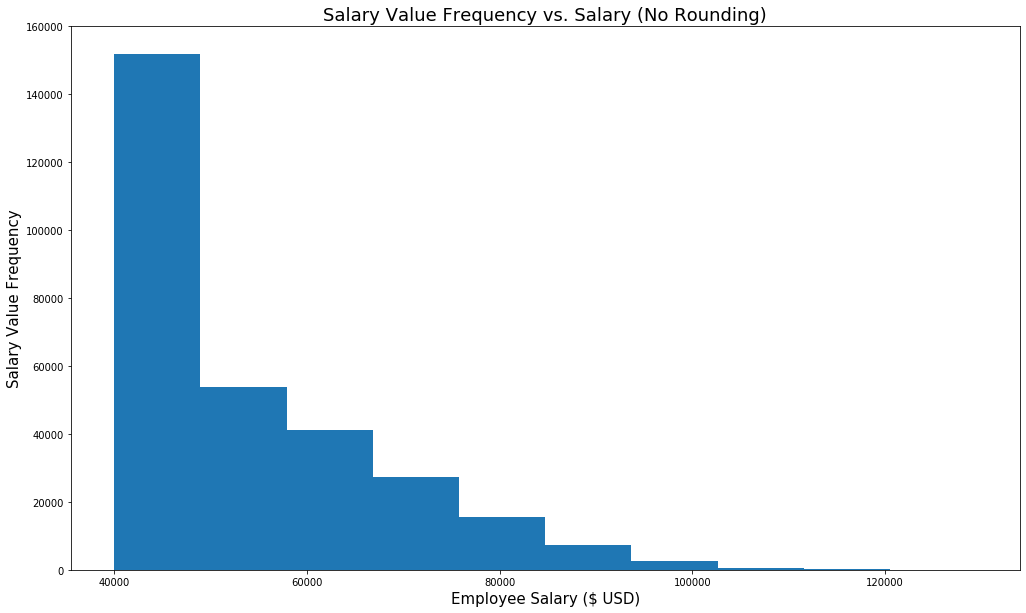

In [4]:
# Histogram
fig=plt.figure(figsize=(17,10))
plt.hist(df_salary["salary"])
plt.xlabel("Employee Salary ($ USD)", fontsize=15)
plt.ylabel("Salary Value Frequency",fontsize=15)
plt.ylim(0, 160000)
plt.title("Salary Value Frequency vs. Salary (No Rounding)", fontsize=18)
plt.show()

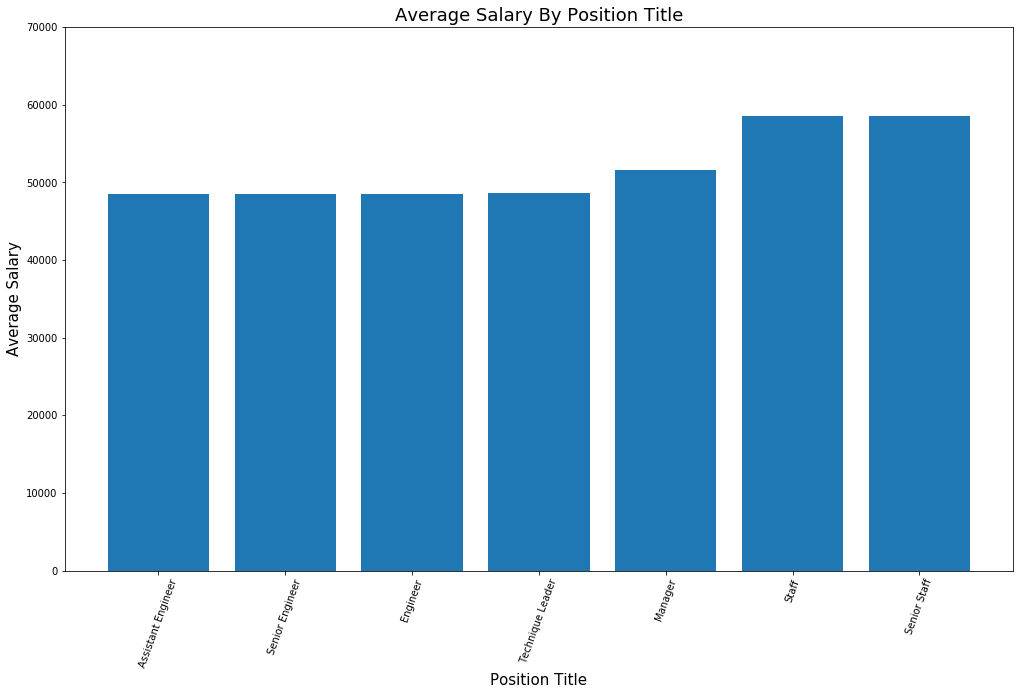

In [5]:
# Generate a bar plot showing the average salary by title
fig=plt.figure(figsize=(17,10))
plt.bar(df_avgsalarybytitle["title"], df_avgsalarybytitle["avg_salary"])

# Formatting
plt.ylim(0, 70000)
plt.title("Average Salary By Position Title", fontsize=18)
plt.xlabel("Position Title", fontsize=15)
plt.ylabel("Average Salary", fontsize=15)
plt.xticks(rotation=70)

# Show the chart
plt.show()

In [6]:
# Find myself:  Employee_ID = 499942
df_myself

,emp_no,first_name,last_name
0,499942,April,Foolsday
